<h1>Dataset Augmentation</h1>

**Preparing a dataset to apply CNN processing using Dataset Augmentation technique.**

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import os
import tensorflow as tf

In [3]:
# Extracting the Data

url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

**Cats and Dogs images getting from above url.**

In [4]:
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=url, extract=True)

68606236/68606236 [==============================] - 8s 0us/step


In [7]:
path = os.path.join(os.path.dirname(path_to_zip),'cats_and_dogs_filtered')

# path of the downloaded Dirctory

# os.path.join = using same path location creating new folder named "cats_and_dogs_filtered"

In [27]:
print(path)

C:\Users\User33\.keras\datasets\cats_and_dogs_filtered


**Making training Dataset and Testing Dataset**

In [8]:
train_dir = os.path.join(path,'train')

# os.path.join = (Use to join path) To create new folder 'train' on same path

In [9]:
print("Training Directory", train_dir)

Training Directory C:\Users\User33\.keras\datasets\cats_and_dogs_filtered\train


In [21]:
validation_dir = os.path.join(path, 'validation')

In [22]:
print("Testing Directory", validation_dir)

Testing Directory C:\Users\User33\.keras\datasets\cats_and_dogs_filtered\validation


**We created 3 paths : Original path, Train data path, Validation data path**

In [12]:
batch_size = 32
# 32 images at a time

img_size = (160,160)

In [16]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir, batch_size= batch_size, image_size=img_size)

# image_dataset_from_directory = take image from path 
# train_dir = path of training data

Found 2000 files belonging to 2 classes.


In [23]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir, batch_size= batch_size, image_size=img_size)

Found 1000 files belonging to 2 classes.


**Code for appling Dataset Augmentation**

In [24]:
# creating a Neural network (2- Layers)

dataset_augmentation = tf.keras.Sequential([tf.keras.layers.RandomFlip('horizontal'),
                                           tf.keras.layers.RandomRotation(0.2)])


# dataset_augmentation = Name of my Neural network

# RandomFlip = to flip image
# RandomRotation = rotate that img

**Displaying the Results of Dataset Augmentation by Image into Consideration**

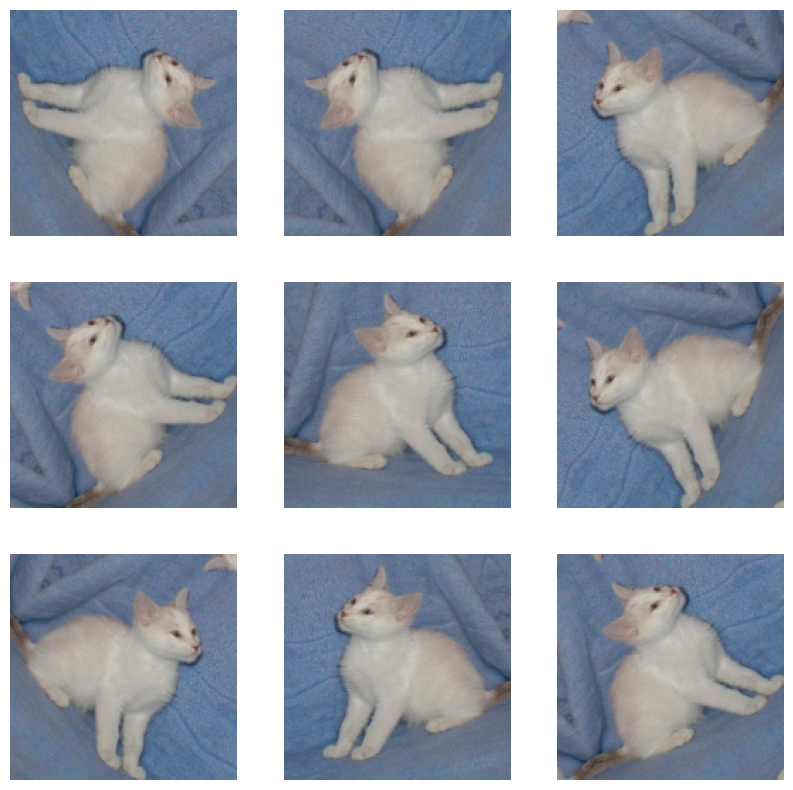

In [26]:
for image,_ in train_dataset.take(1):
    plt.figure(figsize=(10,10))
    first_image = image[0]
    
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        
        augmented_image = dataset_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0]/255)
        plt.axis('off')
        
        
# train_dataset.take(1) = taking 1 image from train data

# tf.expand_dims = To expand dimention of img(Adding one extra dimention)
# 0 = add extra dimention ar 0th position
# old dim of img = (160,160,3)    3 = 3 colors(RGB)
# New dim of img = (1,160,160,3)